In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import svm, datasets
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn import svm, datasets, preprocessing
from sklearn.svm import SVC  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score, matthews_corrcoef, roc_curve, auc , make_scorer
from sklearn.utils import shuffle
from sklearn.cross_validation import KFold

from sklearn.metrics import roc_auc_score

C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
def DATA(filename):
    #filename = 'classifier-train-data.csv'
    data = pd.read_csv(filename)

    #specify featuure and target
    Feature = data.drop(['class_id', 'Unnamed: 0'], axis=1)
    Target  = data['class_id']
   
    # shuffle the dataset
    X, y = shuffle(Feature, Target, random_state=0)

    #standardize data
    X = (X - X.mean()) / X.std()

    # Split the dataset in two equal parts
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.5, random_state=0)

    return X_train, X_test, y_train, y_test, X, y


def run_SVM (X_train, X_test, y_train, y_test, kernel= 'rbf'):
    #Train algorithm
    svclassifier = SVC(C=.5, cache_size=200, class_weight={1: 7}, gamma=0.003, coef0=0.0,
  decision_function_shape='ovr', degree=3, kernel= kernel,
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
    
    svclassifier.fit(X_train, y_train)
    #make prediction
    y_pred = svclassifier.predict(X_test)
    
    # results
    print("Confusion Marix:  ")
    print(confusion_matrix(y_test,y_pred))  
    print("Classification Report: ")
    print(classification_report(y_test,y_pred))
    print("Accuracy:  %f " % (accuracy_score(y_test, y_pred)))
    print("Matthew's corrcoef:  %f " % matthews_corrcoef(y_test, y_pred))
    
    #AUROC results
    prob_y = svclassifier.predict_proba(X_test)
    prob_yy  = [p[1] for p in prob_y]
    print("AUROC:  %f" % roc_auc_score(y_test, prob_yy) )
    
    return svclassifier, prob_y , y_pred
    
    # Validate with k-fold
def run_kfold(clf):
    kf = KFold(891, n_folds=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test =X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

In [51]:
filename = './feature-tables/train-data_1526424532.csv'
X_train, X_test, y_train, y_test, X, y = DATA(filename)
Region_per_img = y.size/410
scv , prob_y, y_pred = run_SVM (X_train, X_test, y_train, y_test, 'linear')

Confusion Marix:  
[[2818  319]
 [   6   45]]
Classification Report: 
             precision    recall  f1-score   support

       -1.0       1.00      0.90      0.95      3137
        1.0       0.12      0.88      0.22        51

avg / total       0.98      0.90      0.93      3188

Accuracy:  0.898055 
Matthew's corrcoef:  0.307980 
AUROC:  0.910374


In [40]:
y_test.shape

(3188,)

In [49]:
scv , prob_y, y_pred = run_SVM (X_train, X_test, y_train, y_test, 'rbf')

Confusion Marix:  
[[2882  255]
 [   9   42]]
Classification Report: 
             precision    recall  f1-score   support

       -1.0       1.00      0.92      0.96      3137
        1.0       0.14      0.82      0.24        51

avg / total       0.98      0.92      0.94      3188

Accuracy:  0.917189 
Matthew's corrcoef:  0.320395 
AUROC:  0.900079


In [42]:
scv , prob_y, y_pred = run_SVM (X_train, X_test, y_train, y_test, 'sigmoid')

Confusion Marix:  
[[3071   66]
 [  37   14]]
Classification Report: 
             precision    recall  f1-score   support

       -1.0       0.99      0.98      0.98      3137
        1.0       0.17      0.27      0.21        51

avg / total       0.98      0.97      0.97      3188

Accuracy:  0.967691 
Matthew's corrcoef:  0.203322 
AUROC:  0.907149


In [43]:
scv , prob_y, y_pred =run_SVM (X_train, X_test, y_train, y_test,'poly')

Confusion Marix:  
[[   0 3137]
 [   0   51]]
Classification Report: 
             precision    recall  f1-score   support

       -1.0       0.00      0.00      0.00      3137
        1.0       0.02      1.00      0.03        51

avg / total       0.00      0.02      0.00      3188

Accuracy:  0.015997 
Matthew's corrcoef:  0.000000 
AUROC:  0.277748


C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Confusion Marix:  
[[2891  246]
 [  12   39]]
Classification Report: 
             precision    recall  f1-score   support

       -1.0       1.00      0.92      0.96      3137
        1.0       0.14      0.76      0.23        51

avg / total       0.98      0.92      0.95      3188

Accuracy:  0.919072 
Matthew's corrcoef:  0.301788 
AUROC:  0.906386
Confusion Marix:  
[[2817  312]
 [  15   44]]
Classification Report: 
             precision    recall  f1-score   support

       -1.0       0.99      0.90      0.95      3129
        1.0       0.12      0.75      0.21        59

avg / total       0.98      0.90      0.93      3188

Accuracy:  0.897428 
Matthew's corrcoef:  0.276454 
AUROC:  0.901458


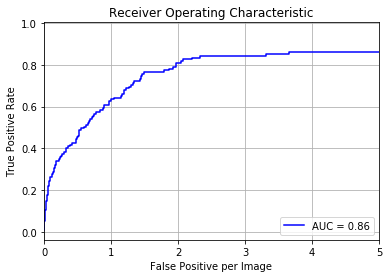

In [53]:
scv , prob_y, y_pred = run_SVM (X_train, X_test, y_train, y_test, 'rbf')
scv2 , prob_y2, y_pred2 = run_SVM (X_test, X_train, y_test, y_train, 'rbf')

test = y_test.append(y_train)
prob = np.append(prob_y[:,1], prob_y2[:,1])

false_positive_rate, true_positive_rate, thresholds = roc_curve(test, prob, pos_label=1, drop_intermediate=True)
fp = false_positive_rate * Region_per_img
tp = 110/115 * true_positive_rate
roc_auc = auc(false_positive_rate, tp)

plt.title('Receiver Operating Characteristic')

plt.plot(fp, tp, 'b',
label='AUC = %0.2f'% roc_auc)

plt.legend(loc='lower right')
plt.xlim([-0,5])
#plt.ylim([-0,110/115])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive per Image')
plt.grid()
plt.show()

In [53]:
y_pred.shape

(3188,)

In [77]:
#run_kfold(svc)

In [19]:
parameters = [{'kernel': ['rbf'],
                'C': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5,1],
              'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5]}
            ]

def Mattew_score(actual,prediction):
    return matthews_corrcoef(actual, prediction)

grid_scorer = make_scorer(Mattew_score, greater_is_better=True)
#parameters = {'n_estimators': [10,20,30], 'max_features': ['auto','sqrt','log2',0.5,0.3], }

clf = GridSearchCV(svm.SVC(decision_function_shape='ovr', class_weight='balanced', probability=True), parameters, cv=25,scoring = grid_scorer)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on training set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classi

C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classi

C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classi

C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classi

C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classi

C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classi

C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classi

C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classi

C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classi

Best parameters set found on development set:

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

Grid scores on training set:

0.000 (+/-0.000) for {'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 0.0001, 'gamma': 0.001, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 0.0001, 'gamma': 0.01, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 0.0001, 'gamma': 0.1, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 0.0001, 'gamma': 0.2, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 0.0001, 'gamma': 0.5, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 0.001, 'gamma': 0.0001, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 0.001, 'gamma': 0.2, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 0.001, 'gamma': 0.5, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}
0.000 (+/-0.000)

In [20]:
clf.best_estimator_ 

SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
print("Best Score:  %f " % (clf.best_score_ ))
print("Best Params:  %r" % (clf.best_params_ ))
print("Best Index:  %f" % (clf.best_index_ ))
print("Best Estimator:  %r" % (clf.best_estimator_ ))


Best Score:  0.315330 
Best Params:  {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best Index:  38.000000
Best Estimator:  SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


# Experiment with Full dataset 

In [45]:
def Load_Full_data():
    filename = './feature-tables/train-data_1527093743.csv'
    data = pd.read_csv(filename)
    data = data.drop(['Unnamed: 0'],axis=1)
    data = data.sample(frac=1).reset_index(drop=True)
    data_per_imgfile = list(data.groupby('img_name'))
    np.random.shuffle(data_per_imgfile)

    # Splits in two datasets, for training and testing, with all regions associated to one image in the same set
    data1 = []
    data2 = []
    i = 0
    for name, group in data_per_imgfile:
        if i % 2 == 0:
            train = data[data['img_name']==name]
            data1.append(train)
        else:
            test = data[data['img_name']==name]
            data2.append(test)
        i += 1
    dataset_df1 = pd.concat(data1)
    dataset_df2 = pd.concat(data2)
    return dataset_df1, dataset_df2

def Select_Features(dataset_df1, dataset_df2, Feature_catagory= None):
    
    dataset01_labels = dataset_df1['class_id'].as_matrix()
    dataset02_labels = dataset_df2['class_id'].as_matrix()
    dataset_df1 = dataset_df1.drop(['class_id','img_name'], axis=1)
    dataset_df2 = dataset_df2.drop(['class_id','img_name'], axis=1)
    
    if Feature_catagory == 'Intensity':
        dataset01_data = dataset_df1.iloc[:,9:24].as_matrix()
        dataset02_data = dataset_df2.iloc[:,9:24].as_matrix()
    elif Feature_catagory == 'Geometry':
        dataset01_data = dataset_df1.iloc[:,0:9].as_matrix()
        dataset02_data = dataset_df2.iloc[:,0:9].as_matrix()
    elif Feature_catagory == "LBP":
        dataset01_data = dataset_df1.iloc[:,24:].as_matrix()
        dataset02_data = dataset_df2.iloc[:,24:].as_matrix()
    else:
        dataset01_data = dataset_df1.as_matrix()
        dataset02_data = dataset_df2.as_matrix()

    # Shuflles the datasets and creates one variable with labels for all the samples
    dataset01_data, dataset01_labels = shuffle(dataset01_data, dataset01_labels, random_state=None)
    dataset02_data, dataset02_labels = shuffle(dataset02_data, dataset02_labels, random_state=None)
    all_data = np.concatenate((dataset01_data, dataset02_data),axis=0)
    all_labels = np.concatenate((dataset01_labels, dataset02_labels),axis=0)

    # Data standardization for each dataset (two methods)
    dataset01_data = preprocessing.StandardScaler().fit_transform(dataset01_data)
    dataset02_data = preprocessing.StandardScaler().fit_transform(dataset02_data)
    #dataset01_data = preprocessing.robust_scale(dataset01_data)
    #dataset02_data = preprocessing.robust_scale(dataset02_data)
    return dataset01_data, dataset01_labels, dataset02_data, dataset02_labels

def Plot_SVM_performance(X_train, X_test, y_train, y_test):
    
    scv , prob_y, y_pred = run_SVM (X_train, X_test, y_train, y_test, 'rbf')
    scv2 , prob_y2, y_pred2 = run_SVM (X_test, X_train, y_test, y_train, 'rbf')

    test = np.append(y_test,y_train)
    prob = np.append(prob_y[:,1], prob_y2[:,1])
    Region_per_img = prob.size/ 410;
    false_positive_rate, true_positive_rate, thresholds = roc_curve(test, prob, pos_label=1, drop_intermediate=True)
    fp = false_positive_rate * Region_per_img
    tp = 110/115 * true_positive_rate
    roc_auc = auc(false_positive_rate, tp)

    plt.title('Free Response ROC Curve')

    plt.plot(fp, tp, 'b', label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.xlim([-0,5])
    #plt.ylim([-0,110/115])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive per Image')
    plt.grid(color='k', linestyle='dotted', linewidth=0.5, alpha=0.5)
    plt.show()



## Geometrical features

Confusion Marix:  
[[3108   68]
 [  25   27]]
Classification Report: 
             precision    recall  f1-score   support

       -1.0       0.99      0.98      0.99      3176
        1.0       0.28      0.52      0.37        52

avg / total       0.98      0.97      0.98      3228

Accuracy:  0.971190 
Matthew's corrcoef:  0.370828 
AUROC:  0.954496
Confusion Marix:  
[[3086    4]
 [  46   12]]
Classification Report: 
             precision    recall  f1-score   support

       -1.0       0.99      1.00      0.99      3090
        1.0       0.75      0.21      0.32        58

avg / total       0.98      0.98      0.98      3148

Accuracy:  0.984117 
Matthew's corrcoef:  0.388821 
AUROC:  0.922821


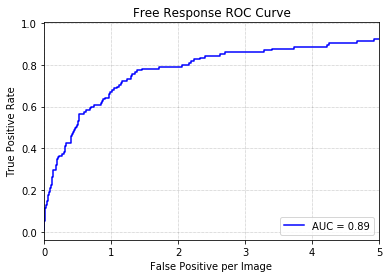

In [46]:
Train,Test = Load_Full_data()
TrainX, TrainY, TestX, TestY = Select_Features(Train,Test, Feature_catagory= 'Geometry')
Plot_SVM_performance(TrainX, TestX, TrainY, TestY)

## Intensity Based Features

Confusion Marix:  
[[3176    0]
 [  52    0]]
Classification Report: 
             precision    recall  f1-score   support

       -1.0       0.98      1.00      0.99      3176
        1.0       0.00      0.00      0.00        52

avg / total       0.97      0.98      0.98      3228

Accuracy:  0.983891 
Matthew's corrcoef:  0.000000 
AUROC:  0.909532


C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Confusion Marix:  
[[3090    0]
 [  58    0]]
Classification Report: 
             precision    recall  f1-score   support

       -1.0       0.98      1.00      0.99      3090
        1.0       0.00      0.00      0.00        58

avg / total       0.96      0.98      0.97      3148

Accuracy:  0.981576 
Matthew's corrcoef:  0.000000 
AUROC:  0.881821


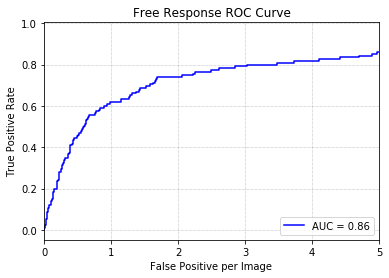

In [49]:
TrainX, TrainY, TestX, TestY = Select_Features(Train,Test, Feature_catagory= 'Intensity')
Plot_SVM_performance(TrainX, TestX, TrainY, TestY)

## Local Binary Patterns 

Confusion Marix:  
[[3176    0]
 [  52    0]]
Classification Report: 
             precision    recall  f1-score   support

       -1.0       0.98      1.00      0.99      3176
        1.0       0.00      0.00      0.00        52

avg / total       0.97      0.98      0.98      3228

Accuracy:  0.983891 
Matthew's corrcoef:  0.000000 


C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


AUROC:  0.783714
Confusion Marix:  
[[3090    0]
 [  58    0]]
Classification Report: 
             precision    recall  f1-score   support

       -1.0       0.98      1.00      0.99      3090
        1.0       0.00      0.00      0.00        58

avg / total       0.96      0.98      0.97      3148

Accuracy:  0.981576 
Matthew's corrcoef:  0.000000 
AUROC:  0.740325


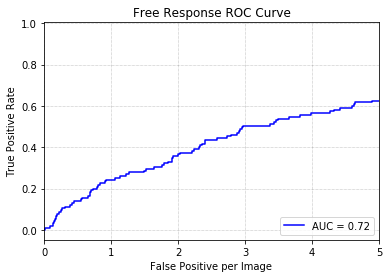

In [50]:
TrainX, TrainY, TestX, TestY = Select_Features(Train,Test, Feature_catagory= 'LBP')
Plot_SVM_performance(TrainX, TestX, TrainY, TestY)